# Convergence of (linear/non-linear) one-dimensional convnets with normalization

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
#%matplotlib notebook

import os

import warnings
warnings.filterwarnings('ignore')

from include import *
from include.onedim import *
from PIL import Image
import PIL

import numpy as np
import torch
import torch.optim
from torch.autograd import Variable

GPU = False
if GPU == True:
    torch.backends.cudnn.enabled = True
    torch.backends.cudnn.benchmark = True
    dtype = torch.cuda.FloatTensor
    os.environ['CUDA_VISIBLE_DEVICES'] = '0'
    print("num GPUs",torch.cuda.device_count())
else:
    dtype = torch.FloatTensor


## generate signals

In [8]:
n = 1024

# noise
shape = [1,1,n]
y = Variable(torch.zeros(shape),requires_grad=False).type(dtype)
y.data.uniform_()
y_np = y.data.cpu().numpy()[0,0]

# step function
ystep_np = np.zeros([1,n])
ystep_np[0,:int(n/2)] = np.ones(int(n/2))
ystep = np_to_var(ystep_np).type(dtype)
ystep_np = ystep_np[0]
print(ystep.shape)

torch.Size([1, 1, 1024])


# ReLU networks

## standard BN

input shape:  [1, 4, 1024]
optimize with SGD 0.1


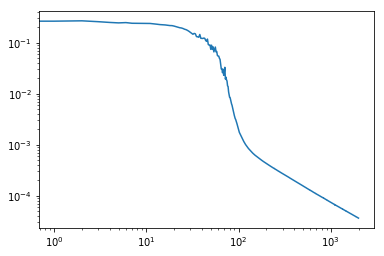

Error: 0.9897621


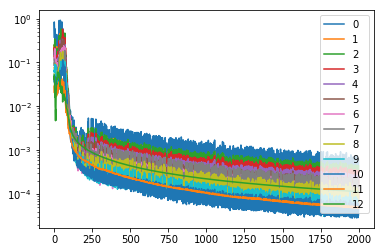

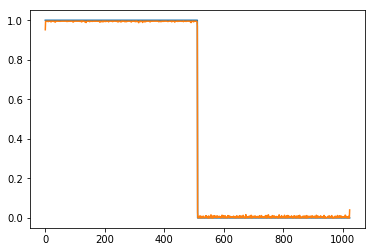

In [9]:
num_channels = [4]*12
net = decnet(1,num_channels,3,act_fun=nn.ReLU(),mode="BN",res=False).type(dtype)

mse, ni, net, out_grads, out_norms = fit(net,ystep,num_channels,num_iter = 2000,LR = 0.1)

plt.loglog(mse)
plt.show()

yy_np = net(ni).type(dtype).data.cpu().numpy()[0,0]
print("Error:", np.linalg.norm(yy_np - y_np)/np.linalg.norm(y_np) )
plot_gradients(out_grads)

plt.plot(ystep_np)
plt.plot(yy_np)
plt.show()

## non-learned

input shape:  [1, 4, 1024]
optimize with SGD 0.1


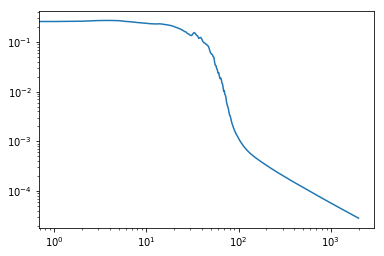

Error: 0.98993033


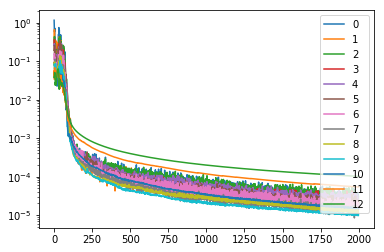

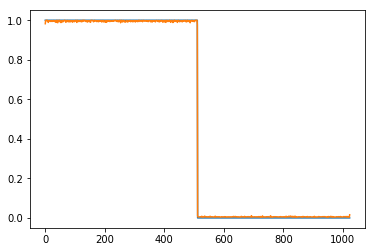

In [10]:
num_channels = [4]*12
net = decnet(1,num_channels,3,act_fun=nn.ReLU(),mode="non-learned",res=False).type(dtype)

mse, ni, net, out_grads, out_norms = fit(net,ystep,num_channels,num_iter = 2000,LR = 0.1)

plt.loglog(mse)
plt.show()

yy_np = net(ni).type(dtype).data.cpu().numpy()[0,0]
print("Error:", np.linalg.norm(yy_np - y_np)/np.linalg.norm(y_np) )
plot_gradients(out_grads)

plt.plot(ystep_np)
plt.plot(yy_np)
plt.show()

## only+bias, so that the expressive power is exactly the same

input shape:  [1, 4, 1024]
optimize with SGD 0.1


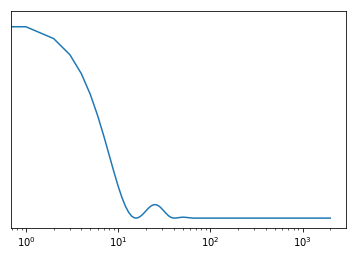

Error: 0.51281285


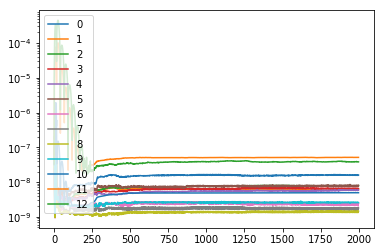

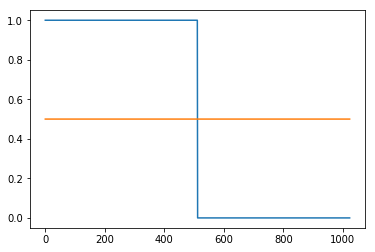

In [11]:
num_channels = [4]*12
net = decnet(1,num_channels,3,act_fun=nn.ReLU(),mode="only+bias",res=False).type(dtype) # can also be "linear"

mse, ni, net, out_grads, out_norms = fit(net,ystep,num_channels,num_iter = 2000,LR = 0.1)

plt.loglog(mse)
plt.show()

yy_np = net(ni).type(dtype).data.cpu().numpy()[0,0]
print("Error:", np.linalg.norm(yy_np - y_np)/np.linalg.norm(y_np) )
plot_gradients(out_grads)

plt.plot(ystep_np)
plt.plot(yy_np)
plt.show()

# Linear networks

In [12]:
n = 128

# noise
shape = [1,1,n]
y = Variable(torch.zeros(shape),requires_grad=False).type(dtype)
y.data.uniform_()
y_np = y.data.cpu().numpy()[0,0]

# step function
ystep_np = np.zeros([1,n])
ystep_np[0,:int(n/2)] = np.ones(int(n/2))
ystep = np_to_var(ystep_np).type(dtype)
ystep_np = ystep_np[0]
print(ystep.shape)

torch.Size([1, 1, 128])


## With batch normalization

input shape:  [1, 1, 128]
optimize with SGD 0.1


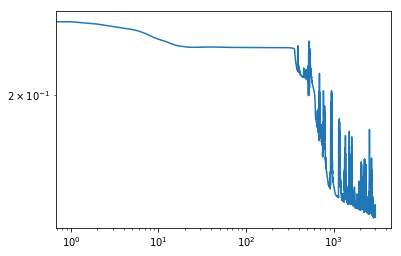

Error: 0.9132747


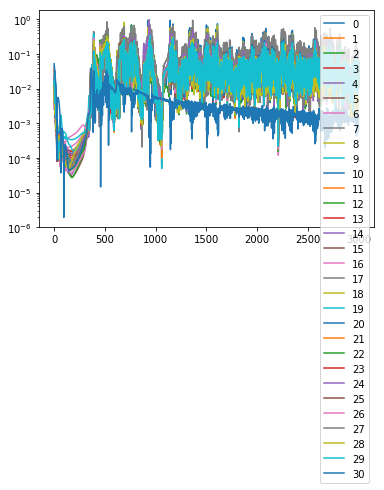

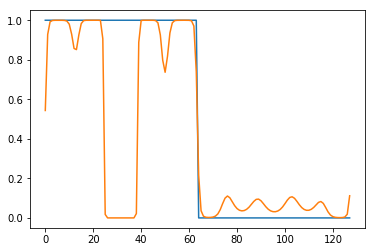

array([0.02150496, 0.02028375, 0.01109745, 0.03547887, 0.0116025 ,
       0.01126221, 0.01465791, 0.01998351, 0.01825039, 0.02246512,
       0.00872592, 0.01756371, 0.01252356, 0.02228816, 0.01985434,
       0.01029732, 0.00899707, 0.04460518, 0.01280396, 0.01993097,
       0.02153244, 0.02258932, 0.01340864, 0.01781888, 0.02197577,
       0.01015261, 0.01227989, 0.01754766, 0.01430309, 0.01618051,
       0.05241853])

In [19]:
num_channels = [1]*30
net = decnet(1,num_channels,15,act_fun=None,mode="BN",res=False).type(dtype)

mse, ni, net, out_grads, out_norms = fit(net,ystep,num_channels,num_iter = 3000,LR = 0.1)

plt.loglog(mse)
plt.show()

yy_np = net(ni).type(dtype).data.cpu().numpy()[0,0]
print("Error:", np.linalg.norm(yy_np - y_np)/np.linalg.norm(y_np) )
plot_gradients(out_grads)

plt.plot(ystep_np)
plt.plot(yy_np)
plt.show()

out_grads[:,0]

input shape:  [1, 1, 128]
optimize with SGD 0.1


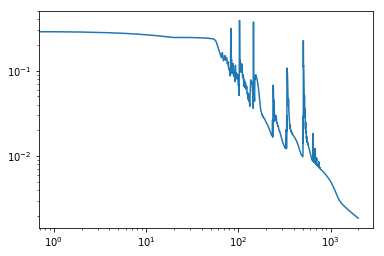

Error: 0.95243055


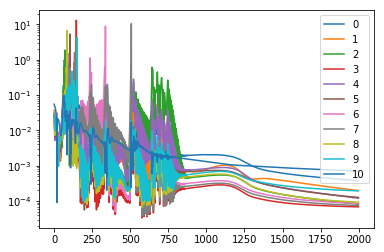

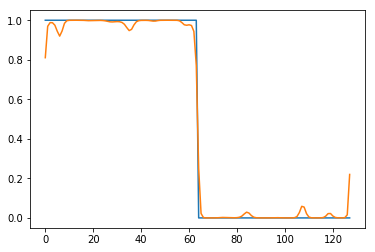

array([0.02966814, 0.03745194, 0.01836585, 0.02434616, 0.01956289,
       0.02667763, 0.02803365, 0.0220274 , 0.02128412, 0.02903911,
       0.05524471])

In [18]:
num_channels = [1]*10
net = decnet(1,num_channels,15,act_fun=None,mode="BN",res=False).type(dtype)

mse, ni, net, out_grads, out_norms = fit(net,ystep,num_channels,num_iter = 2000,LR = 0.1)

plt.loglog(mse)
plt.show()

yy_np = net(ni).type(dtype).data.cpu().numpy()[0,0]
print("Error:", np.linalg.norm(yy_np - y_np)/np.linalg.norm(y_np) )
plot_gradients(out_grads)

plt.plot(ystep_np)
plt.plot(yy_np)
plt.show()

out_grads[:,0]

input shape:  [1, 1, 128]
optimize with SGD 0.1


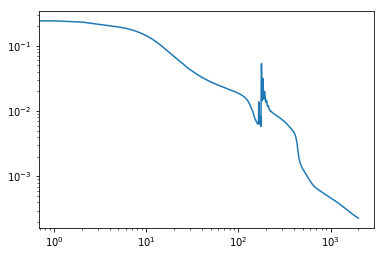

Error: 0.9586408


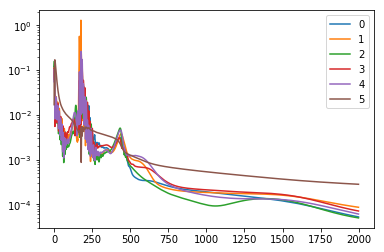

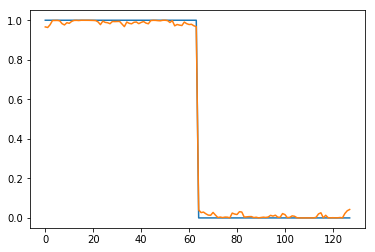

array([0.07123162, 0.0711906 , 0.12150534, 0.0621518 , 0.05511713,
       0.01687296])

In [17]:
num_channels = [1]*5
net = decnet(1,num_channels,15,act_fun=None,mode="BN",res=False).type(dtype)

mse, ni, net, out_grads, out_norms = fit(net,ystep,num_channels,num_iter = 2000,LR = 0.1)

plt.loglog(mse)
plt.show()

yy_np = net(ni).type(dtype).data.cpu().numpy()[0,0]
print("Error:", np.linalg.norm(yy_np - y_np)/np.linalg.norm(y_np) )
plot_gradients(out_grads)

plt.plot(ystep_np)
plt.plot(yy_np)
plt.show()

out_grads[:,0]

## without batch normalization

input shape:  [1, 1, 128]
optimize with SGD 0.1


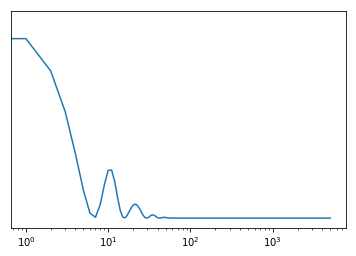

Error: 0.49862862


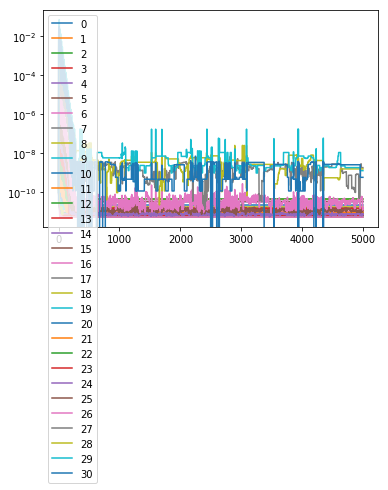

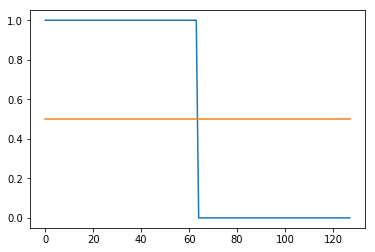

array([6.67384370e-10, 2.57958405e-10, 1.25261385e-10, 1.83511595e-10,
       2.89249846e-10, 9.45789891e-10, 1.95482991e-10, 7.26005478e-10,
       1.32178091e-09, 9.54157101e-11, 2.46476783e-10, 8.51218263e-11,
       1.39237177e-10, 1.72471051e-10, 2.03339415e-10, 1.02222661e-10,
       1.36622810e-10, 4.23087315e-10, 4.96666763e-10, 3.25843325e-10,
       9.97268379e-11, 1.55598548e-10, 8.35539027e-10, 3.51588536e-10,
       1.96443251e-10, 1.71119424e-10, 3.30121375e-10, 6.82316037e-10,
       1.00046853e-10, 9.86587478e-11, 3.72509870e-11])

In [20]:
num_channels = [1]*30
net = decnet(1,num_channels,15,act_fun=None,mode="only+bias",res=False).type(dtype)

mse, ni, net, out_grads, out_norms = fit(net,ystep,num_channels,num_iter = 5000,LR = 0.1)

plt.loglog(mse)
plt.show()

yy_np = net(ni).type(dtype).data.cpu().numpy()[0,0]
print("Error:", np.linalg.norm(yy_np - y_np)/np.linalg.norm(y_np) )
plot_gradients(out_grads)

plt.plot(ystep_np)
plt.plot(yy_np)
plt.show()

out_grads[:,0]

input shape:  [1, 1, 128]
optimize with SGD 0.1


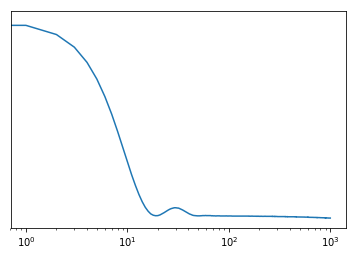

Error: 0.4986245


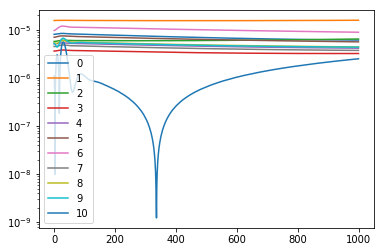

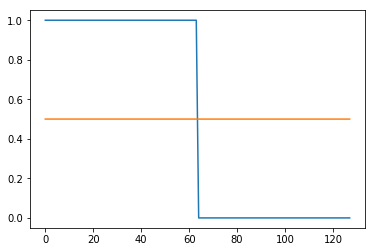

array([8.10157508e-06, 1.56958467e-05, 5.74812066e-06, 3.62496576e-06,
       5.07604909e-06, 7.04535751e-06, 9.74099567e-06, 4.51420874e-06,
       5.39248686e-06, 5.26723397e-06, 1.10381154e-06])

In [23]:
num_channels = [1]*10
net = decnet(1,num_channels,15,act_fun=None,mode="only+bias",res=False).type(dtype)

mse, ni, net, out_grads, out_norms = fit(net,ystep,num_channels,num_iter = 1000,LR = 0.1)

plt.loglog(mse)
plt.show()

yy_np = net(ni).type(dtype).data.cpu().numpy()[0,0]
print("Error:", np.linalg.norm(yy_np - y_np)/np.linalg.norm(y_np) )
plot_gradients(out_grads)

plt.plot(ystep_np)
plt.plot(yy_np)
plt.show()

out_grads[:,0]

input shape:  [1, 1, 128]
optimize with SGD 0.1


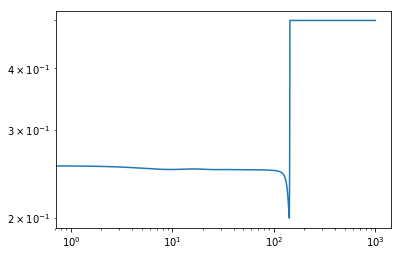

Error: 0.98193765


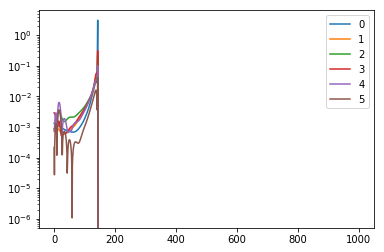

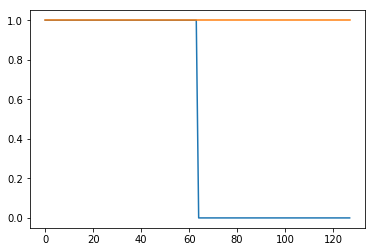

array([0.00133073, 0.00085412, 0.00088553, 0.00290216, 0.00071817,
       0.00021787])

In [24]:
num_channels = [1]*5
net = decnet(1,num_channels,15,act_fun=None,mode="only+bias",res=False).type(dtype)

mse, ni, net, out_grads, out_norms = fit(net,ystep,num_channels,num_iter = 1000,LR = 0.1)

plt.loglog(mse)
plt.show()

yy_np = net(ni).type(dtype).data.cpu().numpy()[0,0]
print("Error:", np.linalg.norm(yy_np - y_np)/np.linalg.norm(y_np) )
plot_gradients(out_grads)

plt.plot(ystep_np)
plt.plot(yy_np)
plt.show()

out_grads[:,0]

In [16]:
def res_to_mtx(results,filename):
    ks = [i for i in range(len( results[0] ))]
    A = [np.array(ks)]
    for res in results:
        A += [np.array(res)]
    A = np.vstack( A ).T
    print(A)
    savemtx_for_logplot(A.T,filename)
    

def savemtx_for_logplot(A,filename = "exp.dat"):
    ind = sorted(list(set([int(i) for i in np.geomspace(1, len(A[0])-1 ,num=700)])))
    A = [ [a[i] for i in ind]  for a in A]
    X = np.array([ind] + A)
    np.savetxt(filename, X.T, delimiter=' ')